# Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Steps of Data Preprocessing
* Basic preprocessing:- Removing commas, drop columns like indexes, identifiers, name, address etc.
* Handlling missing values
* Encoding of catogorical columns using dummy encoding and frequency encoding based on cardinality
* Scalling of the features using StandardScaler on both numerical and transformed columns
* **Clutering**
  * Kmeans clustering with visualtion of results
  * DBSCAN with visualization

## 1- Basic preprocessing like drop columns 

In [2]:
df=pd.read_csv('Healthcare Providers.csv')
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
df.columns

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

In [5]:
irrelavent_columns=['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider','Zip Code of the Provider','HCPCS Description']
df=df.drop(irrelavent_columns,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               92791 non-null   object
 1   Gender of the Provider                                    95746 non-null   object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [6]:
# converting the values like M.D. as MD As it has the same meaning
df['Credentials of the Provider']=df['Credentials of the Provider'].str.replace(".","")

In [7]:
# Preprocessing for numerical columns
df.iloc[:,11:]=df.iloc[:,11:].apply(lambda x: x.str.replace(',', ''))

In [8]:
# Converting numerical columns of 'object' datatypes as 'Float'
object_cols = df.iloc[:,11:].columns
df[object_cols] = df[object_cols].apply(lambda x: x.astype(float))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               92791 non-null   object 
 1   Gender of the Provider                                    95746 non-null   object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

## Handling missing values

In [10]:
df.isnull().sum()

Credentials of the Provider                                 7209
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
City of the Provider                                           0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service                                               0
HCPCS Code                                                     0
HCPCS Drug Indicator                                           0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge 

In [11]:
# fill the missing the values with mode of the columns for 'credential of the provider'
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
# fill the missing values of 'Gender of the provider' by creating another category for the organization gender
df["Gender of the Provider"] = df["Gender of the Provider"].fillna('O')

In [12]:
columns=['Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Drug Indicator']
for i in columns:
    if df[i].nunique() >5:
        print(f"categorical values in {i} :",df[i].nunique())
print("\n")
for i in columns:
    if df[i].nunique() <5:
        print(f"categorical values in {i} :",df[i].nunique())


categorical values in Credentials of the Provider : 1539
categorical values in City of the Provider : 5846
categorical values in State Code of the Provider : 58
categorical values in Provider Type : 90
categorical values in HCPCS Code : 2631


categorical values in Gender of the Provider : 3
categorical values in Entity Type of the Provider : 2
categorical values in Country Code of the Provider : 4
categorical values in Medicare Participation Indicator : 2
categorical values in Place of Service : 2
categorical values in HCPCS Drug Indicator : 2


In [13]:
df.columns

Index(['Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

## 3- Encoding of categorical columns

In [14]:
# Columns to be frequency encoded
frequency_encode_cols = ['Credentials of the Provider', 'City of the Provider',
                    'State Code of the Provider', 'Provider Type', 'HCPCS Code']

# Function to perform frequency encoding
def frequency_encoding(df, columns):
    for column in columns:
        frequency = df[column].value_counts()
        df[column] = df[column].map(frequency)
    return df

# Apply frequency encoding
encoded_data = frequency_encoding(df, frequency_encode_cols)
encoded_data.head()


,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,73827,F,I,500,1997,US,11366,Y,F,1297,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,73827,F,I,209,3725,US,1028,Y,O,243,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,1915,M,I,10,1403,US,2027,Y,O,44,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,73827,M,I,317,1997,US,11366,Y,O,460,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,6176,M,I,51,7263,US,11366,Y,O,732,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [15]:
new_df=pd.get_dummies(encoded_data)
new_df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,73827,500,1997,11366,1297,27.0,24.0,27.0,200.587778,305.211111,...,False,False,False,True,False,True,True,False,True,False
1,73827,209,3725,1028,243,175.0,175.0,175.0,123.730000,548.800000,...,False,False,False,True,False,True,False,True,True,False
2,1915,10,1403,2027,44,32.0,13.0,32.0,90.650000,155.000000,...,False,False,False,True,False,True,False,True,True,False
3,73827,317,1997,11366,460,20.0,18.0,20.0,3.500000,5.000000,...,False,False,False,True,False,True,False,True,True,False
4,6176,51,7263,11366,732,33.0,24.0,31.0,26.520000,40.000000,...,False,False,False,True,False,True,False,True,True,False


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  int64  
 1   City of the Provider                                      100000 non-null  int64  
 2   State Code of the Provider                                100000 non-null  int64  
 3   Provider Type                                             100000 non-null  int64  
 4   HCPCS Code                                                100000 non-null  int64  
 5   Number of Services                                        100000 non-null  float64
 6   Number of Medicare Beneficiaries                          100000 non-null  float64
 7   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  float64
 8   Avera

## 3- Standardized the data

In [17]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

numerical_cols=new_df.iloc[:,:12].columns
scaled_data=ss.fit_transform(new_df[numerical_cols])
scaled_df=pd.DataFrame(scaled_data,columns=new_df.iloc[:,:12].columns)
scaled_df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,0.594983,1.571686,-0.737342,1.336743,0.397579,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,0.594983,0.189180,-0.004973,-0.940500,-0.439989,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-1.684316,-0.756245,-0.989093,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,0.594983,0.702275,-0.737342,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-1.549260,-0.561459,1.494517,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


In [18]:
final_df=scaled_df.join(new_df.iloc[:,12:])
final_df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.594983,1.571686,-0.737342,1.336743,0.397579,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,...,False,False,False,True,False,True,True,False,True,False
1,0.594983,0.189180,-0.004973,-0.940500,-0.439989,-0.025939,0.076775,0.020049,0.086673,0.182805,...,False,False,False,True,False,True,False,True,True,False
2,-1.684316,-0.756245,-0.989093,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,...,False,False,False,True,False,True,False,True,True,False
3,0.594983,0.702275,-0.737342,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,...,False,False,False,True,False,True,False,True,True,False
4,-1.549260,-0.561459,1.494517,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,...,False,False,False,True,False,True,False,True,True,False


## 4- Pricipal component analysis and visualization of first two PCA components 

In [19]:
# Performing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_trf=pca.fit_transform(final_df)

In [20]:
df_trf

array([[ 0.55012452, -0.15188049],
       [ 0.45203891,  0.0989331 ],
       [-0.21916218, -0.14330877],
       ...,
       [-0.45995591, -0.16345065],
       [-0.65249322, -0.17207296],
       [-0.46610969,  0.25341299]])

In [21]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=df_trf, columns=[f'PC{i}' for i in range(1, 3)])


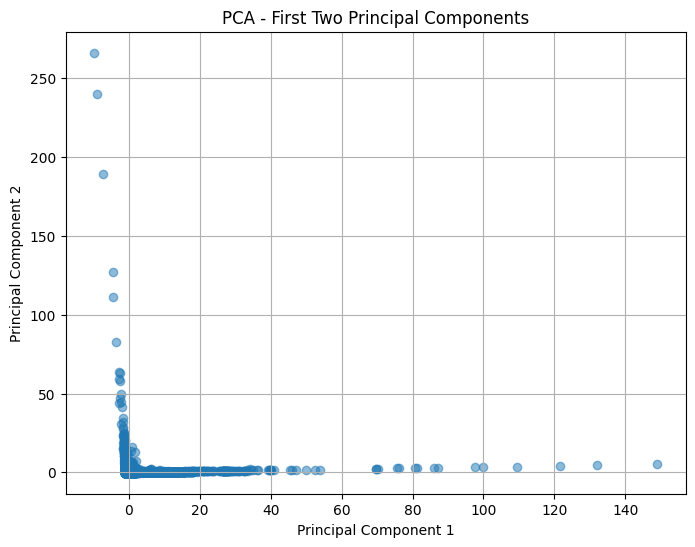

,PC1,PC2
0,0.550125,-0.151880
1,0.452039,0.098933
2,-0.219162,-0.143309
3,-0.805519,-0.189933
4,-0.740097,-0.181284


In [22]:
# Plot the First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid()
plt.show()

pca_df.head()

# Clustering

# 1- Kmeans clustering 

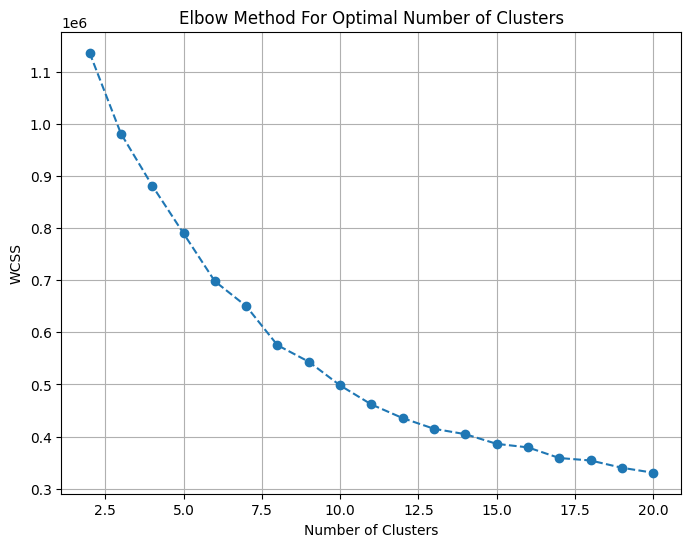

In [23]:
from sklearn.cluster import KMeans


# Determine the Optimal Number of Clusters 
# Using the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(final_df.iloc[:,:].values)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(2,21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid()
plt.show()


In [24]:
x=final_df.iloc[:,:].values
x

array([[0.5949834997851534, 1.5716863325517119, -0.7373418293935087, ...,
        False, True, False],
       [0.5949834997851534, 0.18918015057231366, -0.004973375158328581,
        ..., True, True, False],
       [-1.6843155101948226, -0.7562450391661752, -0.9890934855368518,
        ..., True, True, False],
       ...,
       [0.5949834997851534, 1.5716863325517119, -0.7373418293935087, ...,
        False, True, False],
       [0.5949834997851534, -0.7752485605679539, 1.1122275770198744, ...,
        True, True, False],
       [0.5949834997851534, -0.4759430984899398, 1.1122275770198744, ...,
        True, True, False]], dtype=object)

In [25]:
# Perform K-means Clustering
x_scaled=final_df.iloc[:,:].values
# Assuming the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=42)
y_means=kmeans.fit_predict(x_scaled)
y_means

array([2, 0, 0, ..., 0, 2, 0])

In [26]:
labels=kmeans.labels_
labels

array([2, 0, 0, ..., 0, 2, 0])

In [27]:
for i in range(0,4):
    print(f"Rows in cluster {i+1} is :",len(new_df[y_means==i]))

Rows in cluster 1 is : 66258
Rows in cluster 2 is : 5
Rows in cluster 3 is : 33640
Rows in cluster 4 is : 97


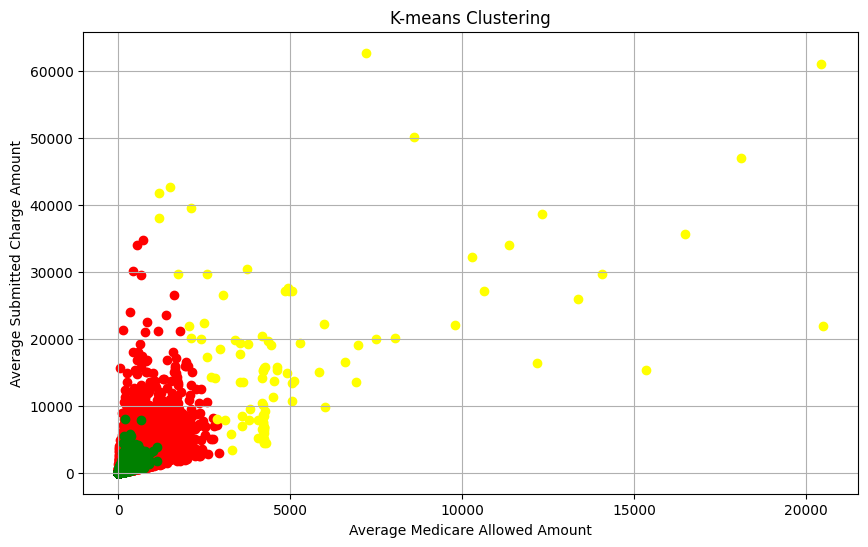

In [28]:
# Plot the graph of the result of kmeans clustering
plt.figure(figsize=(10, 6))
plt.scatter(x=new_df[y_means==0].loc[:,'Average Medicare Allowed Amount'],
            y=new_df[y_means==0].loc[:,'Average Submitted Charge Amount'],
            color='red')
plt.scatter(x=new_df[y_means==1].loc[:,'Average Medicare Allowed Amount'],
            y=new_df[y_means==1].loc[:,'Average Submitted Charge Amount'],
            color='blue')
plt.scatter(x=new_df[y_means==2].loc[:,'Average Medicare Allowed Amount'],
            y=new_df[y_means==2].loc[:,'Average Submitted Charge Amount'],
            color='green')
plt.scatter(x=new_df[y_means==3].loc[:,'Average Medicare Allowed Amount'],
            y=new_df[y_means==3].loc[:,'Average Submitted Charge Amount'],
            color='yellow')
plt.title('K-means Clustering')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()

* The above scatter plot shows the cluster of points in the dataset.
* Different color shows the different cluster as a result of kmeans clustering.  

## 2- DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN with default parameters
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(x_scaled)
labels

array([12,  0,  1, ..., 10, 18, 43], dtype=int64)

In [38]:
len(new_df[labels==-1])

8644

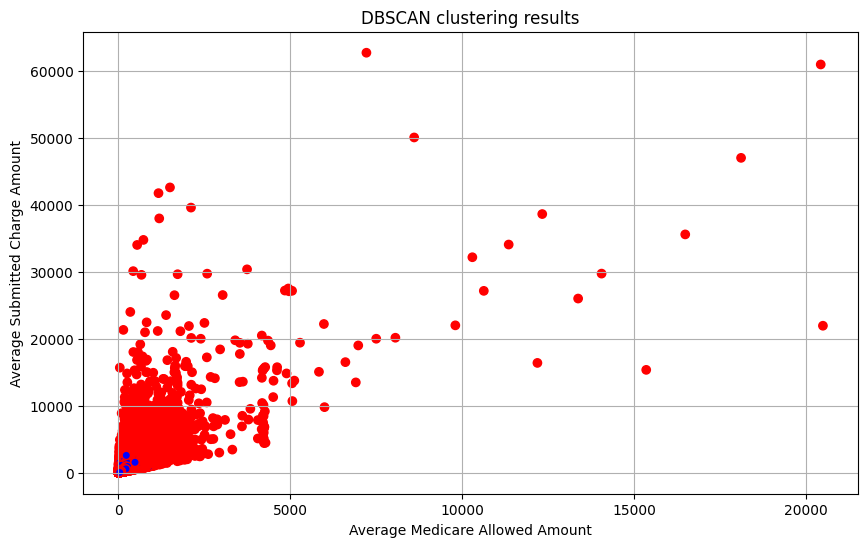

In [42]:
# Visualize the results
anomaly_colors_db = np.where(labels == -1, 'r', 'b')
plt.figure(figsize=(10, 6))
plt.scatter(new_df.values[:, 8], new_df.values[:, 9], c=anomaly_colors_db, marker='o', edgecolor='r')
plt.title('DBSCAN clustering results')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()

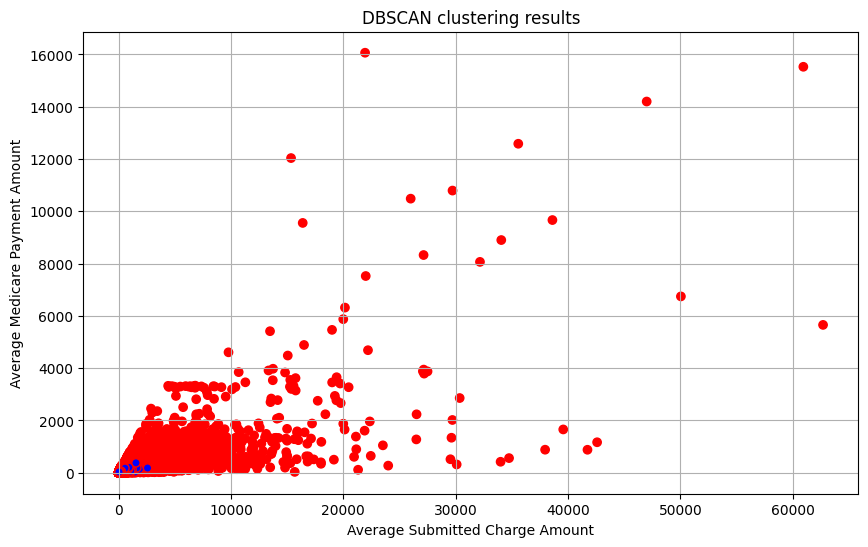

In [41]:
anomaly_colors_db = np.where(labels == -1, 'r', 'b')
plt.figure(figsize=(10, 6))
plt.scatter(new_df.values[:, 9], new_df.values[:, 10], c=anomaly_colors_db, marker='o', edgecolor='k')
plt.title('DBSCAN clustering results')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.grid(True)
plt.show()

**Conclusion**
* In this notebook I have performed the basic preprocessing like Removing commas, drop columns like indexes, identifiers, name, address etc.
* Apart from the above I have done handlling of missing values
* Encoding of catogorical columns using dummy encoding and frequency encoding based on cardinality
* Scalling of the features using StandardScaler on both numerical and transformed columns
* after all the preprocessing, I have performed to clusterig algorithm i.e. Kmeans clustering and DBSCAN algorithm.
* Performed the visualization through scatter plots and count plot for the numerical columns and categorical columns respectively.